In [1]:
import torchvision
import torch
import time

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [28]:
data_dir = './data/letters/'
means = [0.485, 0.456, 0.406]
stds = [0.229, 0.224, 0.225]
# TODO: Define transforms for the training data and testing data
val_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(means, stds,),
        transforms.RandomHorizontalFlip(),
        transforms.Resize((224,224)),
    ]
)

# Pass transforms in here, then run the next cell to see how the transforms look
val_data = datasets.ImageFolder(data_dir + '/val', transform=val_transforms)
valloader = torch.utils.data.DataLoader(val_data, batch_size=1, shuffle=True)


In [8]:
def map_prediction(results):
    results = results.to('cpu').detach().numpy()
    results = results.squeeze()
    indx = np.where(results == np.max(results))[0][0]
    return indx

def get_prediction(model, image, label):
    orig = image.squeeze().permute(1,2,0).numpy()
    image = image.to(device)
    features = model(image).unsqueeze(1)
    plt.imshow(orig, cmap='gray')
    indx = map_prediction(features)
    plt.title(f'Detected Class: {classes[indx]}')
    plt.show()
    return features

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [82]:
from networks.letters import LettersNetwork

PATH = './models/letters.pth'
# torch.save(model.state_dict(), PATH)
model = LettersNetwork()
model.load_state_dict(torch.load(PATH))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


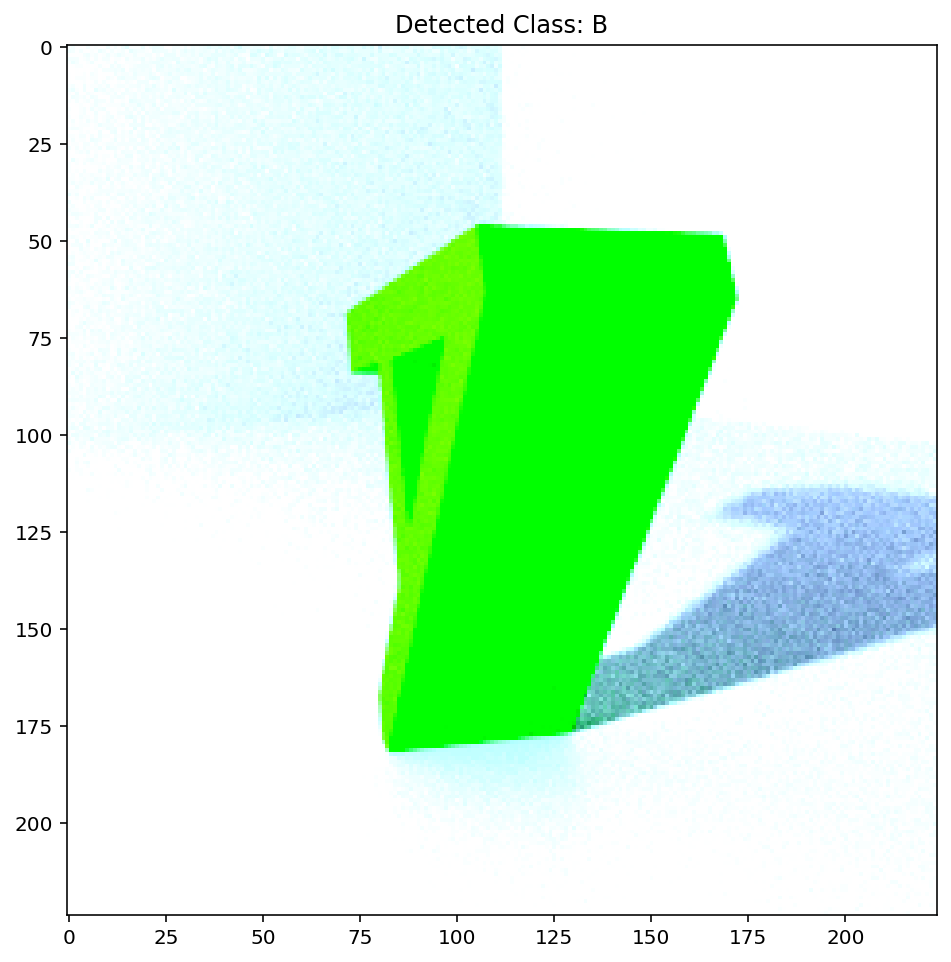

In [102]:
plt.rcParams['figure.figsize'] = (8,8)
model.eval()
model.to(device)
classes = ['A', 'B', 'C']
orig_image, label = next(iter(valloader))
prediction = get_prediction(model, orig_image, label)

In [7]:
# This


























